In [20]:
import pandas as pd
import config
import utils
from importlib import reload

reload(config)
reload(utils)


<module 'utils' from '/home/sagemaker-user/quant_finance/covariance-forecasting/utils.py'>

In [21]:
file_keys = utils.list_s3_files(prefix="output/", bucket_name=config.BUCKET_NAME)

clean_names = {"btm": "Book-to-Market", "industry": "Industry", "momentum": "Momentum", "size": "Size","size_ltr": "Size and Long-Term Reversal", "size_str": "Size and Short-Term Reversal", "sizebtm": "Size and Book-to-Market", "sizemomentum": "Size and Momentum"}

In [22]:
results = list()
for k in file_keys:
    df = utils.read_s3_file(k).set_index("date")    
    df = df.mean()#.loc["1995-01-01":"2013-12-01"].mean()
    df = pd.DataFrame(df).transpose()
    k_clean = k.replace("output/", "").replace("_forecast_error.csv", "")
    df.insert(0, 'file_name', k_clean) 
    results.append(df)
average_forecast_error = pd.concat(results, ignore_index=True).set_index("file_name")
average_forecast_error.index = average_forecast_error.index.map(clean_names)
average_forecast_error.index.name = "Portfolios Sorted On"

In [23]:
average_forecast_error

,Rolling Average,LW Shrunk,EWMA,DCC-GARCH,GO-GARCH
Portfolios Sorted On,,,,,
Book-to-Market,0.005530,0.005528,0.004366,0.003359,0.003601
Industry,0.004054,0.004052,0.003404,0.002757,0.002604
Momentum,0.006467,0.006465,0.004538,0.003267,0.004091
Size,0.004293,0.004292,0.003539,0.002797,0.003121
Size and Long-Term Reversal,0.001789,0.001788,0.001443,0.001115,0.001190
Size and Short-Term Reversal,0.002839,0.002839,0.002417,0.001909,0.002012
Size and Book-to-Market,0.002014,0.002014,0.001579,0.001235,0.001221
Size and Momentum,0.002336,0.002335,0.001733,0.001307,0.001424


<Axes: >

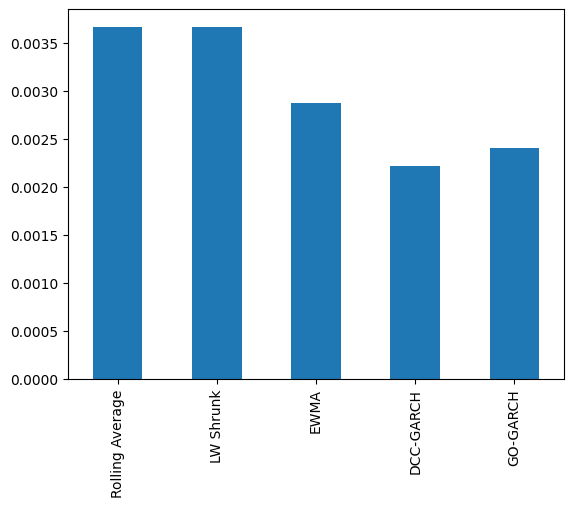

In [28]:
average_forecast_error.mean().plot(kind="bar")